In [5]:
import matplotlib.pyplot as plt


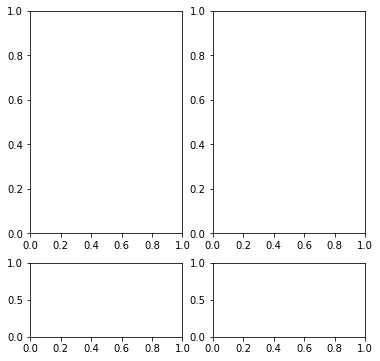

In [21]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,6))

spec = GridSpec(
    ncols=2, 
    nrows=2, 
    width_ratios=[2,2], 
    height_ratios=[3,1]
)

ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])
ax2 = fig.add_subplot(spec[2])
ax3 = fig.add_subplot(spec[3])

# more gridspec https://matplotlib.org/stable/gallery/userdemo/demo_gridspec03.html
